In [1]:
#Duvvada Harshavardhan
#Data scientist
#Emp no:5275

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.svm import SVC

%matplotlib inline
# install seborn 
# import seaborn as sns

In [5]:
telicom1 = pd.read_csv("/content/drive/MyDrive/JAN2ASIGN/Telco_Customer_Call_Details1.csv")
telicom2 = pd.read_csv("/content/drive/MyDrive/JAN2ASIGN/Telco_Customer_Call_Details2.csv")
telochurn1 = pd.read_csv("/content/drive/MyDrive/JAN2ASIGN/Telco_Churn_Details1.csv")
telochurn2 = pd.read_csv("/content/drive/MyDrive/JAN2ASIGN/Telco_Churn_Details2.csv")

In [6]:
telicom1.shape

(500, 13)

In [7]:
telicom2.shape

(4500, 13)

In [8]:
telochurn1.shape

(500, 7)

In [9]:
telochurn2.shape

(4500, 7)

In [10]:
#concat the telicom1 and telicom2 data
customer = pd.concat([telicom1,telicom2],ignore_index=True)

In [11]:
#we concat the two telicom data
customer.shape

(5000, 13)

In [12]:
customer

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,101,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,102,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,103,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,104,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,105,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5096,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67
4996,5097,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97
4997,5098,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67
4998,5099,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30


In [13]:
customer.head(5)


,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,101,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,102,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,103,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,104,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,105,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [14]:
customer.tail(5)

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
4995,5096,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67
4996,5097,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97
4997,5098,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67
4998,5099,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30
4999,5100,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51


In [15]:
#concat the telochurn1 and telochurn2 data
churn = pd.concat([telochurn1,telochurn2],ignore_index=True)

In [16]:
churn.shape

(5000, 7)

In [17]:
churn

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
0,101,no,yes,25,1,False.,No
1,102,no,yes,26,1,False.,Yes
2,103,no,no,0,0,False.,Yes
3,104,yes,no,0,2,False.,Yes
4,105,yes,no,0,3,False.,Yes
...,...,...,...,...,...,...,...
4995,5096,no,yes,40,2,False.,Yes
4996,5097,no,no,0,3,True.,Yes
4997,5098,no,no,0,1,False.,Yes
4998,5099,no,no,0,0,False.,Yes


In [18]:
churn.head(5)

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
0,101,no,yes,25,1,False.,No
1,102,no,yes,26,1,False.,Yes
2,103,no,no,0,0,False.,Yes
3,104,yes,no,0,2,False.,Yes
4,105,yes,no,0,3,False.,Yes


In [19]:
churn.tail(5)

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
4995,5096,no,yes,40,2,False.,Yes
4996,5097,no,no,0,3,True.,Yes
4997,5098,no,no,0,1,False.,Yes
4998,5099,no,no,0,0,False.,Yes
4999,5100,no,yes,34,0,False.,Yes


In [20]:
#for churn data and customer data the columns are not same so we need to add by medge
totaldata = pd.merge(churn,customer,on="Cust_ID")

In [21]:
totaldata.shape

(5000, 19)

In [22]:
totaldata.head(5)

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,101,no,yes,25,1,False.,No,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,102,no,yes,26,1,False.,Yes,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,103,no,no,0,0,False.,Yes,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,104,yes,no,0,2,False.,Yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,105,yes,no,0,3,False.,Yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [23]:
totaldata.tail(5)

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
4995,5096,no,yes,40,2,False.,Yes,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67
4996,5097,no,no,0,3,True.,Yes,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97
4997,5098,no,no,0,1,False.,Yes,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67
4998,5099,no,no,0,0,False.,Yes,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30
4999,5100,no,yes,34,0,False.,Yes,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51


In [24]:
totaldata.describe(include="all")

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
count,5000.000000,5000,5000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,NaN,2,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,no,no,NaN,NaN,False.,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4527,3677,NaN,NaN,4293,3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2600.500000,NaN,NaN,7.755200,1.570400,NaN,NaN,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196
std,1443.520003,NaN,NaN,13.546393,1.306363,NaN,NaN,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514
min,101.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1350.750000,NaN,NaN,0.000000,1.000000,NaN,NaN,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000
50%,2600.500000,NaN,NaN,0.000000,1.000000,NaN,NaN,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000
75%,3850.250000,NaN,NaN,17.000000,2.000000,NaN,NaN,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000


In [25]:
totaldata.dtypes

Cust_ID                        int64
International.Plan            object
Voice.Mail.Plan               object
X..Vmail.Messages              int64
X..customer.Service.Calls      int64
Churn                         object
trainrows                     object
Total.Day.Minutes            float64
Total.Day.Calls                int64
Total.Day.Charge             float64
Total.Eve.Minutes            float64
Total.Eve.Calls                int64
Total.Eve.Charge             float64
Total.Night.Minutes          float64
Total.Night.Calls              int64
Total.Night.Charge           float64
Total.Intl.Minutes           float64
Total.Intl.Calls               int64
Total.Intl.Charge            float64
dtype: object

In [26]:
totaldata.columns

Index(['Cust_ID', 'International.Plan', 'Voice.Mail.Plan', 'X..Vmail.Messages',
       'X..customer.Service.Calls', 'Churn', 'trainrows', 'Total.Day.Minutes',
       'Total.Day.Calls', 'Total.Day.Charge', 'Total.Eve.Minutes',
       'Total.Eve.Calls', 'Total.Eve.Charge', 'Total.Night.Minutes',
       'Total.Night.Calls', 'Total.Night.Charge', 'Total.Intl.Minutes',
       'Total.Intl.Calls', 'Total.Intl.Charge'],
      dtype='object')

In [27]:
totaldata.dtypes

Cust_ID                        int64
International.Plan            object
Voice.Mail.Plan               object
X..Vmail.Messages              int64
X..customer.Service.Calls      int64
Churn                         object
trainrows                     object
Total.Day.Minutes            float64
Total.Day.Calls                int64
Total.Day.Charge             float64
Total.Eve.Minutes            float64
Total.Eve.Calls                int64
Total.Eve.Charge             float64
Total.Night.Minutes          float64
Total.Night.Calls              int64
Total.Night.Charge           float64
Total.Intl.Minutes           float64
Total.Intl.Calls               int64
Total.Intl.Charge            float64
dtype: object

In [28]:
totaldata.trainrows.value_counts(normalize=True)*100

Yes    70.0
No     30.0
Name: trainrows, dtype: float64

In [29]:
totaldata.Churn.value_counts(normalize=True)*100

False.    85.86
True.     14.14
Name: Churn, dtype: float64

In [30]:
totaldata.drop(["Cust_ID"], axis = 1, inplace=True)

In [31]:
totaldata.dtypes

International.Plan            object
Voice.Mail.Plan               object
X..Vmail.Messages              int64
X..customer.Service.Calls      int64
Churn                         object
trainrows                     object
Total.Day.Minutes            float64
Total.Day.Calls                int64
Total.Day.Charge             float64
Total.Eve.Minutes            float64
Total.Eve.Calls                int64
Total.Eve.Charge             float64
Total.Night.Minutes          float64
Total.Night.Calls              int64
Total.Night.Charge           float64
Total.Intl.Minutes           float64
Total.Intl.Calls               int64
Total.Intl.Charge            float64
dtype: object

In [32]:
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

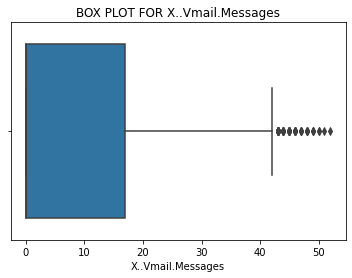

In [33]:
sns.boxplot(totaldata['X..Vmail.Messages']).set_title('BOX PLOT FOR X..Vmail.Messages')
plt.show()

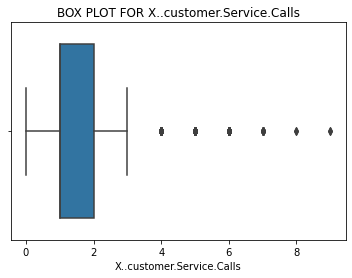

In [34]:
sns.boxplot(totaldata['X..customer.Service.Calls']).set_title('BOX PLOT FOR X..customer.Service.Calls')
plt.show()

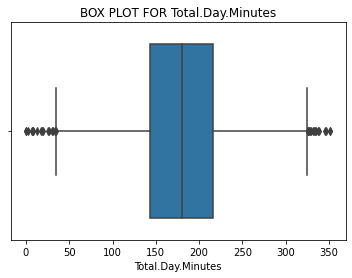

In [35]:
sns.boxplot(totaldata['Total.Day.Minutes']).set_title('BOX PLOT FOR Total.Day.Minutes')
plt.show()

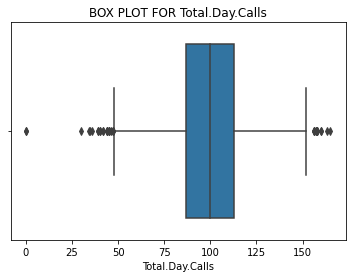

In [36]:
sns.boxplot(totaldata['Total.Day.Calls']).set_title('BOX PLOT FOR Total.Day.Calls')
plt.show()

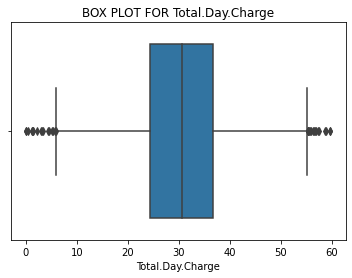

In [37]:
sns.boxplot(totaldata['Total.Day.Charge']).set_title('BOX PLOT FOR Total.Day.Charge')
plt.show()

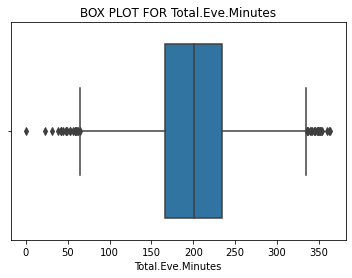

In [38]:
sns.boxplot(totaldata['Total.Eve.Minutes']).set_title('BOX PLOT FOR Total.Eve.Minutes')
plt.show()

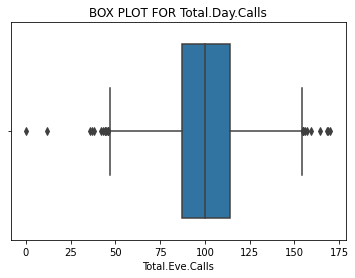

In [39]:
sns.boxplot(totaldata['Total.Eve.Calls']).set_title('BOX PLOT FOR Total.Day.Calls')
plt.show()

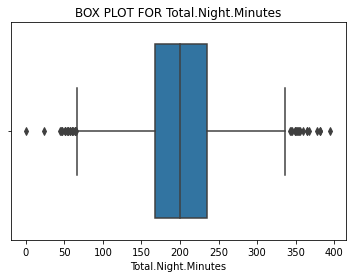

In [40]:
sns.boxplot(totaldata['Total.Night.Minutes']).set_title('BOX PLOT FOR Total.Night.Minutes')
plt.show()

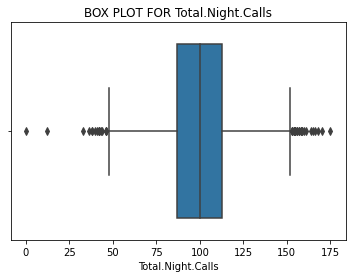

In [41]:
sns.boxplot(totaldata['Total.Night.Calls']).set_title('BOX PLOT FOR Total.Night.Calls')
plt.show()

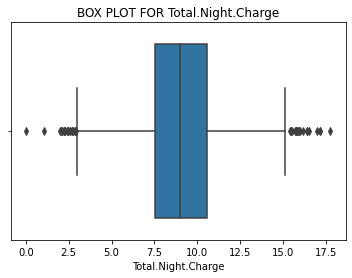

In [42]:
sns.boxplot(totaldata['Total.Night.Charge']).set_title('BOX PLOT FOR Total.Night.Charge')
plt.show()

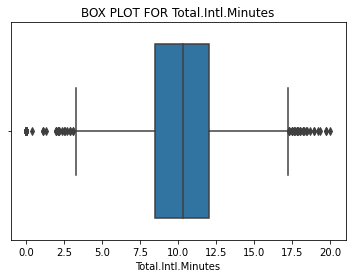

In [43]:
sns.boxplot(totaldata['Total.Intl.Minutes']).set_title('BOX PLOT FOR Total.Intl.Minutes')
plt.show()

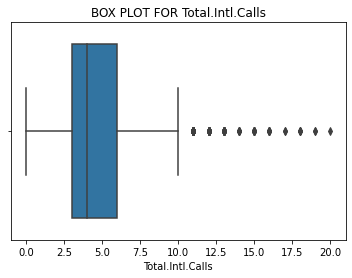

In [44]:
sns.boxplot(totaldata['Total.Intl.Calls']).set_title('BOX PLOT FOR Total.Intl.Calls')
plt.show()

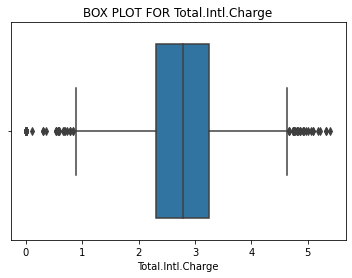

In [45]:
sns.boxplot(totaldata['Total.Intl.Charge']).set_title('BOX PLOT FOR Total.Intl.Charge')
plt.show()

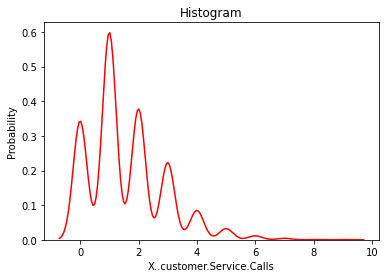

In [46]:
# Plot a histogram of the customer service calls
ax =sns.distplot(totaldata['X..customer.Service.Calls'],hist=False,kde=True,color= 'red')
ax.set(ylabel='Probability', title='Histogram')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

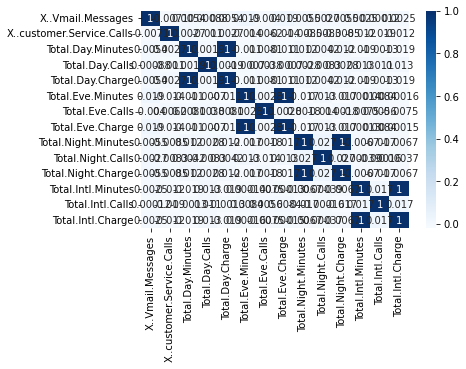

In [47]:
 import seaborn as sb
corr = totaldata.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show

DATA PREPROCESSING

In [48]:
totaldata.head(5)

,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,no,yes,25,1,False.,No,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,no,yes,26,1,False.,Yes,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,no,no,0,0,False.,Yes,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,yes,no,0,2,False.,Yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,yes,no,0,3,False.,Yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [49]:
totaldata.tail(5)

,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
4995,no,yes,40,2,False.,Yes,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67
4996,no,no,0,3,True.,Yes,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97
4997,no,no,0,1,False.,Yes,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67
4998,no,no,0,0,False.,Yes,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30
4999,no,yes,34,0,False.,Yes,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51


In [50]:
totaldata.describe()

,X..Vmail.Messages,X..customer.Service.Calls,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.755200,1.570400,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196
std,13.546393,1.306363,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000
50%,0.000000,1.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000
75%,17.000000,2.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000
max,52.000000,9.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000


In [51]:
totaldata.dtypes

International.Plan            object
Voice.Mail.Plan               object
X..Vmail.Messages              int64
X..customer.Service.Calls      int64
Churn                         object
trainrows                     object
Total.Day.Minutes            float64
Total.Day.Calls                int64
Total.Day.Charge             float64
Total.Eve.Minutes            float64
Total.Eve.Calls                int64
Total.Eve.Charge             float64
Total.Night.Minutes          float64
Total.Night.Calls              int64
Total.Night.Charge           float64
Total.Intl.Minutes           float64
Total.Intl.Calls               int64
Total.Intl.Charge            float64
dtype: object

In [52]:
cat_cols=['International.Plan', 'Voice.Mail.Plan','X..customer.Service.Calls','trainrows','Churn']

In [53]:
totaldata[cat_cols] = totaldata[cat_cols].astype('category')

In [54]:
totaldata_numerical_features = totaldata.select_dtypes(exclude='object')
totaldata_categorical_features = totaldata.select_dtypes(include='object')

In [55]:
totaldata_numerical_features.columns

Index(['International.Plan', 'Voice.Mail.Plan', 'X..Vmail.Messages',
       'X..customer.Service.Calls', 'Churn', 'trainrows', 'Total.Day.Minutes',
       'Total.Day.Calls', 'Total.Day.Charge', 'Total.Eve.Minutes',
       'Total.Eve.Calls', 'Total.Eve.Charge', 'Total.Night.Minutes',
       'Total.Night.Calls', 'Total.Night.Charge', 'Total.Intl.Minutes',
       'Total.Intl.Calls', 'Total.Intl.Charge'],
      dtype='object')

In [56]:
totaldata_categorical_features.columns

Index([], dtype='object')

In [57]:
totaldata.dtypes

International.Plan           category
Voice.Mail.Plan              category
X..Vmail.Messages               int64
X..customer.Service.Calls    category
Churn                        category
trainrows                    category
Total.Day.Minutes             float64
Total.Day.Calls                 int64
Total.Day.Charge              float64
Total.Eve.Minutes             float64
Total.Eve.Calls                 int64
Total.Eve.Charge              float64
Total.Night.Minutes           float64
Total.Night.Calls               int64
Total.Night.Charge            float64
Total.Intl.Minutes            float64
Total.Intl.Calls                int64
Total.Intl.Charge             float64
dtype: object

In [58]:
num_cols=['X..Vmail.Messages','Total.Day.Minutes','Total.Day.Calls', 'Total.Day.Charge', 'Total.Eve.Minutes','Total.Eve.Calls', 'Total.Eve.Charge', 'Total.Night.Minutes','Total.Night.Calls', 'Total.Night.Charge', 'Total.Intl.Minutes','Total.Intl.Calls', 'Total.Intl.Charge']

In [59]:
totaldata[num_cols] = totaldata[num_cols].astype('float64')

In [60]:
totaldata.dtypes

International.Plan           category
Voice.Mail.Plan              category
X..Vmail.Messages             float64
X..customer.Service.Calls    category
Churn                        category
trainrows                    category
Total.Day.Minutes             float64
Total.Day.Calls               float64
Total.Day.Charge              float64
Total.Eve.Minutes             float64
Total.Eve.Calls               float64
Total.Eve.Charge              float64
Total.Night.Minutes           float64
Total.Night.Calls             float64
Total.Night.Charge            float64
Total.Intl.Minutes            float64
Total.Intl.Calls              float64
Total.Intl.Charge             float64
dtype: object

In [61]:
totaldata.head()

,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,no,yes,25.0,1,False.,No,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70
1,no,yes,26.0,1,False.,Yes,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70
2,no,no,0.0,0,False.,Yes,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29
3,yes,no,0.0,2,False.,Yes,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78
4,yes,no,0.0,3,False.,Yes,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73


FOR MISSING VALUES

In [62]:
#there is no missing values in the given data
totaldata.isnull().sum()

International.Plan           0
Voice.Mail.Plan              0
X..Vmail.Messages            0
X..customer.Service.Calls    0
Churn                        0
trainrows                    0
Total.Day.Minutes            0
Total.Day.Calls              0
Total.Day.Charge             0
Total.Eve.Minutes            0
Total.Eve.Calls              0
Total.Eve.Charge             0
Total.Night.Minutes          0
Total.Night.Calls            0
Total.Night.Charge           0
Total.Intl.Minutes           0
Total.Intl.Calls             0
Total.Intl.Charge            0
dtype: int64

In [63]:
totaldata["Churn"]=totaldata["Churn"].replace({"True.":1,"False.":0})

VALIDATION DATA

In [64]:
train=totaldata[totaldata["trainrows"]=="Yes"]

In [65]:
train.head(5)

,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
1,no,yes,26.0,1,0,Yes,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70
2,no,no,0.0,0,0,Yes,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29
3,yes,no,0.0,2,0,Yes,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78
4,yes,no,0.0,3,0,Yes,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73
5,yes,no,0.0,0,0,Yes,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70


In [66]:
vali=totaldata[totaldata["trainrows"]=="No"]

In [67]:
vali.head(5)

,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,no,yes,25.0,1,0,No,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70
6,no,yes,24.0,3,0,No,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03
18,no,yes,33.0,1,0,No,189.7,66.0,32.25,212.8,65.0,18.09,165.7,108.0,7.46,10.0,5.0,2.70
23,no,no,0.0,2,0,No,110.4,103.0,18.77,137.3,102.0,11.67,189.6,105.0,8.53,7.7,6.0,2.08
27,no,no,0.0,3,0,No,134.3,73.0,22.83,155.5,100.0,13.22,102.1,68.0,4.59,14.7,4.0,3.97


In [68]:
train.drop(["trainrows"], axis = 1, inplace=True)

In [69]:
#clearly trainrow column is deleted
totaldata.head()

,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,no,yes,25.0,1,0,No,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70
1,no,yes,26.0,1,0,Yes,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70
2,no,no,0.0,0,0,Yes,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29
3,yes,no,0.0,2,0,Yes,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78
4,yes,no,0.0,3,0,Yes,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73


In [70]:
vali.drop(["trainrows"], axis = 1, inplace=True)

In [71]:
vali.shape

(1500, 17)

In [72]:
train.shape

(3500, 17)

In [73]:
X = train.drop('Churn',axis = 1)
y = train['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)

In [74]:
print(pd.value_counts(y_train)/y_train.count()*100)

print(pd.value_counts(y_valid) /y_valid.count()*100)

0    85.673469
1    14.326531
Name: Churn, dtype: float64
0    85.619048
1    14.380952
Name: Churn, dtype: float64


In [75]:
X_train.head()

,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
3698,no,no,0.0,0,137.5,102.0,23.38,176.0,98.0,14.96,210.6,88.0,9.48,10.4,6.0,2.81
1339,yes,no,0.0,4,148.2,96.0,25.19,220.4,111.0,18.73,134.2,97.0,6.04,9.2,1.0,2.48
3464,no,yes,40.0,2,158.3,90.0,26.91,213.2,71.0,18.12,123.0,132.0,5.54,14.0,2.0,3.78
1,no,yes,26.0,1,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70
1219,no,no,0.0,1,178.6,83.0,30.36,213.1,103.0,18.11,198.0,119.0,8.91,10.9,5.0,2.94


In [76]:
y_train.size

2450

In [77]:
X_train.dtypes

International.Plan           category
Voice.Mail.Plan              category
X..Vmail.Messages             float64
X..customer.Service.Calls    category
Total.Day.Minutes             float64
Total.Day.Calls               float64
Total.Day.Charge              float64
Total.Eve.Minutes             float64
Total.Eve.Calls               float64
Total.Eve.Charge              float64
Total.Night.Minutes           float64
Total.Night.Calls             float64
Total.Night.Charge            float64
Total.Intl.Minutes            float64
Total.Intl.Calls              float64
Total.Intl.Charge             float64
dtype: object

Using StandardScaler, standardize the numerical attributes

In [78]:
scaler= StandardScaler()
scaler.fit(X_train[num_cols])

StandardScaler()

In [79]:
X_train_std =pd.DataFrame(scaler.transform(X_train[num_cols]))
X_test_std =pd.DataFrame(scaler.transform(X_valid[num_cols]))

In [80]:
print(X_train_std.shape)
print(X_test_std.shape)

(2450, 13)
(1050, 13)


In [81]:
categorical_cols=['International.Plan','Voice.Mail.Plan','X..customer.Service.Calls']

Using OneHotEncoder, converting Categorical attributes to Numeric attributes

In [82]:
ohe = OneHotEncoder(drop='first')

ohe.fit(X_train[categorical_cols])

columns_ohe = list(ohe.get_feature_names(categorical_cols))
print(columns_ohe)

['International.Plan_yes', 'Voice.Mail.Plan_yes', 'X..customer.Service.Calls_1', 'X..customer.Service.Calls_2', 'X..customer.Service.Calls_3', 'X..customer.Service.Calls_4', 'X..customer.Service.Calls_5', 'X..customer.Service.Calls_6', 'X..customer.Service.Calls_7', 'X..customer.Service.Calls_8', 'X..customer.Service.Calls_9']


In [83]:
X_train_cat = ohe.transform(X_train[categorical_cols])
X_test_cat  = ohe.transform(X_valid[categorical_cols])

In [84]:
X_train_cat = pd.DataFrame(X_train_cat.todense(),columns=columns_ohe)
X_test_cat  = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [85]:
X_train_cat.head()

,International.Plan_yes,Voice.Mail.Plan_yes,X..customer.Service.Calls_1,X..customer.Service.Calls_2,X..customer.Service.Calls_3,X..customer.Service.Calls_4,X..customer.Service.Calls_5,X..customer.Service.Calls_6,X..customer.Service.Calls_7,X..customer.Service.Calls_8,X..customer.Service.Calls_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Concatenate

In [86]:
X_train = pd.concat([X_train_std, X_train_cat],axis=1)
X_test = pd.concat([X_test_std, X_test_cat],axis=1)

In [87]:
print(X_train.shape, X_test.shape)

(2450, 24) (1050, 24)


In [88]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,Voice.Mail.Plan_yes,X..customer.Service.Calls_1,X..customer.Service.Calls_2,X..customer.Service.Calls_3,X..customer.Service.Calls_4,X..customer.Service.Calls_5,X..customer.Service.Calls_6,X..customer.Service.Calls_7,X..customer.Service.Calls_8,X..customer.Service.Calls_9
0,-0.584913,-0.776607,0.087848,-0.776135,-0.496228,-0.127803,-0.496250,0.187060,-0.602884,0.188355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.584913,-0.580532,-0.212468,-0.581029,0.380881,0.529901,0.379925,-1.319128,-0.157806,-1.318725,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.379581,-0.395451,-0.512784,-0.395625,0.238647,-1.493803,0.238157,-1.539930,1.573053,-1.537778,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.342008,-0.334980,1.138953,-0.335261,-0.111011,0.125160,-0.110454,1.050555,0.138913,1.051421,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.584913,-0.023458,-0.863153,-0.023738,0.236672,0.125160,0.235833,-0.061343,0.930163,-0.061365,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,Voice.Mail.Plan_yes,X..customer.Service.Calls_1,X..customer.Service.Calls_2,X..customer.Service.Calls_3,X..customer.Service.Calls_4,X..customer.Service.Calls_5,X..customer.Service.Calls_6,X..customer.Service.Calls_7,X..customer.Service.Calls_8,X..customer.Service.Calls_9
0,-0.584913,1.444358,-0.312574,1.444405,-0.213736,1.592345,-0.212713,0.908611,-1.344681,0.906846,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.584913,-0.947028,-1.463785,-0.947526,-3.022856,-1.139655,-3.022516,-1.672018,-0.998509,-1.673590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.584913,-0.206706,0.087848,-0.206987,1.913847,0.833456,1.913813,-0.126401,0.485085,-0.127081,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.584913,-0.578699,-0.712995,-0.578873,-0.334239,2.553604,-0.333565,-0.433947,-0.850150,-0.433754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.584913,-0.545715,0.988795,-0.545457,-0.020139,-0.785507,-0.019815,1.293044,0.237819,1.292378,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train,y_train)

LogisticRegression()

In [91]:
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
test_preds = logistic_model.predict(X_test)
test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [92]:
train_preds

array([0, 1, 0, ..., 0, 0, 0])

In [93]:
logistic_model.coef_

array([[-0.05161393,  0.38076866, -0.00752337,  0.37877329,  0.21112476,
        -0.0274139 ,  0.19601582,  0.11468883,  0.03444637,  0.1151356 ,
         0.09382165, -0.14294376,  0.07787747,  1.95572612, -1.30929306,
        -0.34666517, -0.258039  , -0.24511352,  2.06388672,  2.4605452 ,
         3.7331173 ,  1.78464012,  0.81543863,  0.93209903]])

Confusion Matrix

In [94]:
confusion_matrix(y_train,train_preds)

array([[2027,   72],
       [ 274,   77]])

In [95]:
train_accuracy_1= accuracy_score(y_train,train_preds)
train_recall_1= recall_score(y_train,train_preds)
train_precision_1= precision_score(y_train,train_preds)

test_accuracy_1= accuracy_score(y_valid,test_preds)
test_recall_1= recall_score(y_valid,test_preds)
test_precision_1= precision_score(y_valid,test_preds)

In [96]:
print(train_accuracy_1)
print(train_recall_1)
print(train_precision_1)

print(test_accuracy_1)
print(test_recall_1)
print(test_precision_1)

0.8587755102040816
0.21937321937321938
0.5167785234899329
0.8457142857142858
0.2119205298013245
0.4266666666666667


visualize confusion matrix with seaborn heatmap

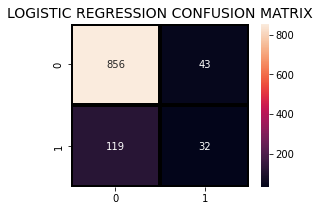

In [97]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_valid, test_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

The confusion matrix shows 855 + 32 = 1296correct predictions and 166 + 38 = 204 incorrect predictions.


In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 1257
True Negatives (Actual Negative:0 and Predict Negative:0) - 39
False Positives (Actual Negative:0 but Predict Positive:1) - 119(Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 44 (Type II error

Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later



In [98]:
#bhfrom sklearn.metrics import classification_report

print(classification_report(y_valid, test_preds))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       899
           1       0.43      0.21      0.28       151

    accuracy                           0.85      1050
   macro avg       0.65      0.58      0.60      1050
weighted avg       0.81      0.85      0.82      1050



In [99]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2099
           1       0.52      0.22      0.31       351

    accuracy                           0.86      2450
   macro avg       0.70      0.59      0.61      2450
weighted avg       0.83      0.86      0.83      2450



In [100]:
fpr, tpr, threshold = roc_curve(y_train, train_preds_prob)
roc_auc = auc(fpr, tpr)

In [101]:
%matplotlib notebook
# plt.figure()
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
roc_df = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':threshold})

roc_df

,FPR,TPR,Threshold
0,0.000000,0.000000,1.993543
1,0.000000,0.002849,0.993543
2,0.000000,0.008547,0.967497
3,0.000476,0.008547,0.950212
4,0.000476,0.017094,0.921776
...,...,...,...
383,0.915198,0.994302,0.012915
384,0.915198,0.997151,0.012877
385,0.948071,0.997151,0.009878
386,0.948071,1.000000,0.009872


In [103]:
roc_df.sort_values('TPR',ascending=False,inplace=True)

In [104]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [105]:
custom_threshold = 0.099


## To get in 0-1 format vector (pandas Series)
final_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in train_preds_prob])
final_pred_array.value_counts()

final_test_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in test_preds_prob])
final_test_pred_array.value_counts()

1    580
0    470
dtype: int64

In [106]:
## To get True-False format vector (pandas Series)
final_pred = pd.Series(train_preds_prob > 0.099)
final_pred.value_counts()
final_test_pred=pd.Series(test_preds_prob > 0.099)

In [107]:
print(classification_report(y_train,final_pred))

              precision    recall  f1-score   support

           0       0.97      0.66      0.79      2099
           1       0.30      0.88      0.45       351

    accuracy                           0.69      2450
   macro avg       0.64      0.77      0.62      2450
weighted avg       0.88      0.69      0.74      2450



In [108]:
print(classification_report(y_valid,final_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76       899
           1       0.29      0.90      0.44       151

    accuracy                           0.67      1050
   macro avg       0.63      0.76      0.60      1050
weighted avg       0.88      0.67      0.72      1050



In [109]:
train_accuracy= accuracy_score(y_train,final_pred)
train_recall= recall_score(y_train,final_pred)
print(train_accuracy)
print(train_recall)

test_accuracy= accuracy_score(y_valid,final_test_pred)
test_recall= recall_score(y_valid,final_test_pred)
print(test_accuracy)
print(test_recall)

0.6938775510204082
0.8803418803418803
0.6676190476190477
0.9006622516556292


The recall value before roc is approximately 21 after ROC 88 there is asiginficant change the Recall value

In [110]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [111]:
logistic_model = LogisticRegression(penalty="l1",solver  = "saga",class_weight="balanced")
logistic_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')

In [112]:
train_preds =logistic_model.predict(X_train)
test_preds =logistic_model.predict(X_test)
                                                   

In [113]:
confusion_matrix(y_train,train_preds)

array([[1785,  314],
       [  54,  297]])

In [114]:
train_accuracy_1= accuracy_score(y_train,train_preds)
train_recall_1= recall_score(y_train,train_preds)
train_precision_1= precision_score(y_train,train_preds)

test_accuracy_1= accuracy_score(y_valid,test_preds)
test_recall_1= recall_score(y_valid,test_preds)
test_precision_1= precision_score(y_valid,test_preds)

In [115]:
print(train_accuracy_1)
print(train_recall_1)
print(train_precision_1)

print(test_accuracy_1)
print(test_recall_1)
print(test_precision_1)

0.8497959183673469
0.8461538461538461
0.486088379705401
0.820952380952381
0.8410596026490066
0.436426116838488


In [116]:
logistic_model = LogisticRegression(penalty="l2",solver  = "saga",class_weight="balanced")
logistic_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='saga')

In [117]:
train_preds =logistic_model.predict(X_train)
test_preds =logistic_model.predict(X_test)

In [118]:
confusion_matrix(y_train,train_preds)

array([[1777,  322],
       [  54,  297]])

In [119]:
train_accuracy_2= accuracy_score(y_train,train_preds)
train_recall_2= recall_score(y_train,train_preds)
train_precision_2= precision_score(y_train,train_preds)

test_accuracy_2= accuracy_score(y_valid,test_preds)
test_recall_2= recall_score(y_valid,test_preds)
test_precision_2= precision_score(y_valid,test_preds)

In [120]:
print(train_accuracy_2)
print(train_recall_2)
print(train_precision_2)

print(test_accuracy_2)
print(test_recall_2)
print(test_precision_2)

0.846530612244898
0.8461538461538461
0.4798061389337641
0.8104761904761905
0.8344370860927153
0.42


**Decission Tree**

In [121]:
dtclf = DecisionTreeClassifier()

In [122]:
import graphviz

In [123]:
dtclf.fit(X_train, y_train)

DecisionTreeClassifier()

In [124]:
importances = dtclf.feature_importances_
importances

array([0.03891877, 0.01855059, 0.01417387, 0.23305357, 0.06951194,
       0.01623804, 0.06881645, 0.0430875 , 0.0255836 , 0.04222644,
       0.01727664, 0.08293507, 0.09449371, 0.05907426, 0.04301873,
       0.00040443, 0.00249407, 0.00087077, 0.05045378, 0.03900342,
       0.02984608, 0.00542726, 0.00149529, 0.00304574])

In [125]:
#features are working in apart of target variable
indices = np.argsort(importances)[::-1]   
ind_attr_names = X_train.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,3.000000,12.000000,11.000000,4.000000,6.000000,International.Plan_yes,X..customer.Service.Calls_4,7.000000,Voice.Mail.Plan_yes,9.000000,...,1.000000,10.000000,5.000000,2.000000,X..customer.Service.Calls_7,X..customer.Service.Calls_9,X..customer.Service.Calls_2,X..customer.Service.Calls_8,X..customer.Service.Calls_3,X..customer.Service.Calls_1
1,0.233054,0.094494,0.082935,0.069512,0.068816,0.059074,0.050454,0.043088,0.043019,0.042226,...,0.018551,0.017277,0.016238,0.014174,0.005427,0.003046,0.002494,0.001495,0.000871,0.000404


0.178105 is highest value so we will consider this as the root value

In [126]:
dtclf.classes_

array([0, 1])

In [127]:
dot_data = export_graphviz(dtclf, 
                           feature_names=ind_attr_names,
                           class_names=['No', 'Yes'], 
                           filled=True) 

graph = graphviz.Source(dot_data)
graph.render("/content/drive/MyDrive/JAN2ASIGN/Telco_Customer_Call_Details2.xlsx", view=True) 

 

'/content/drive/MyDrive/JAN2ASIGN/Telco_Customer_Call_Details2.xlsx.pdf'

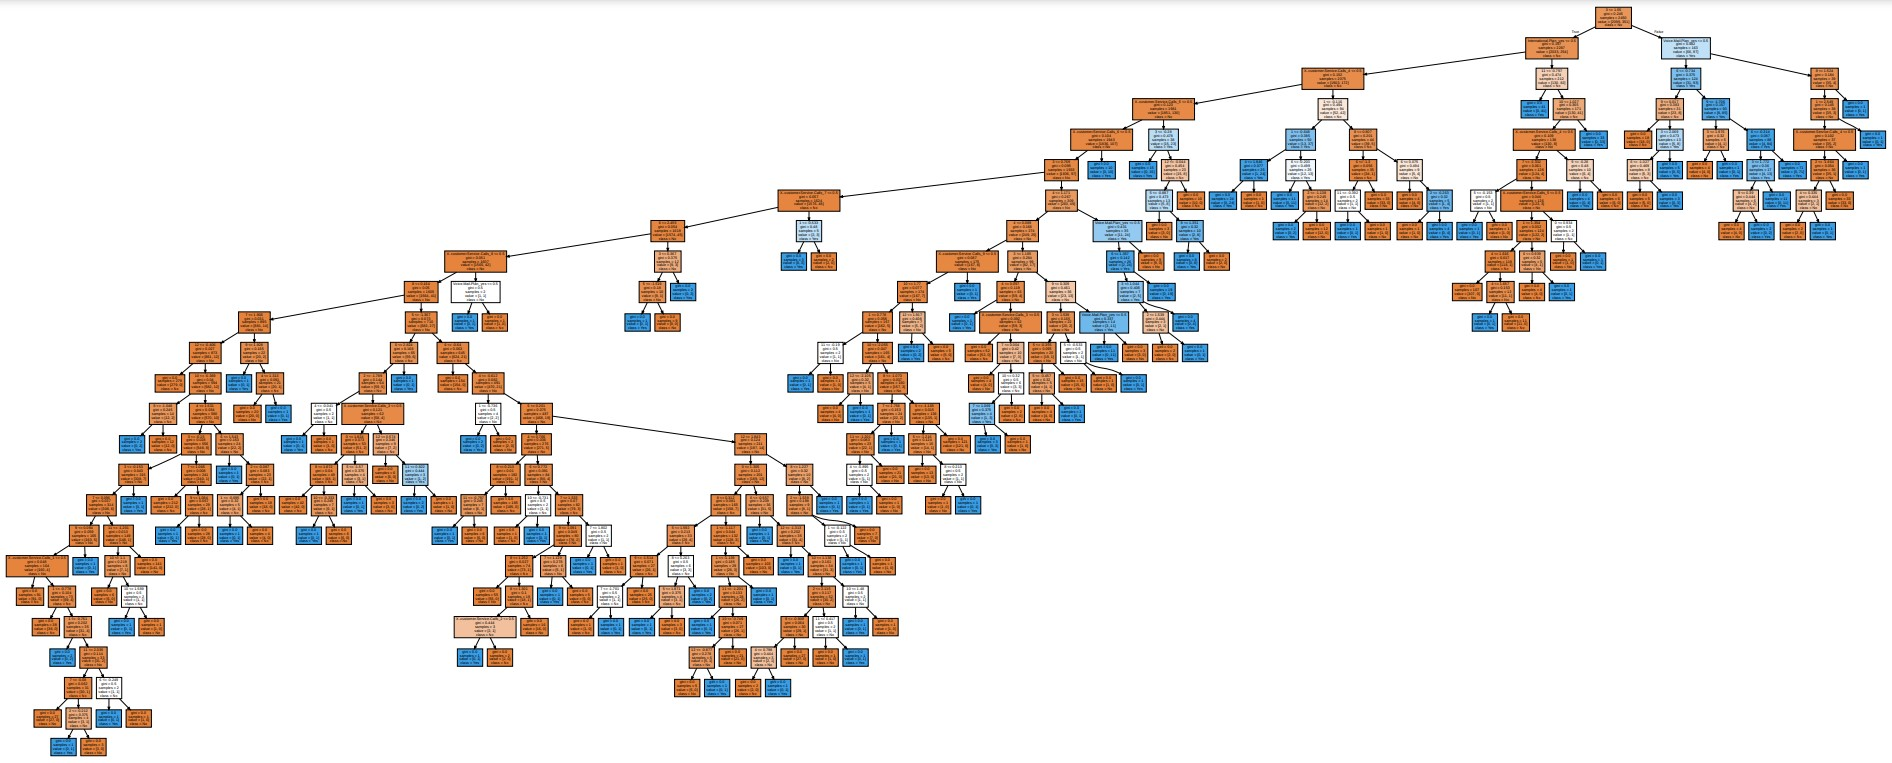

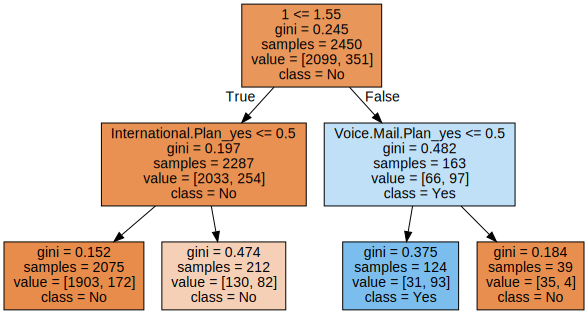

In [128]:
# Decision Tree Graph explanation
dtclf2 = DecisionTreeClassifier(max_depth=2) 
dtclf2.fit(X_train, y_train)
dot_data2 = export_graphviz(dtclf2, 
                           feature_names=ind_attr_names,
                           class_names=['No', 'Yes'], 
                           filled=True) 

graph2 = graphviz.Source(dot_data2) 
graph2

In [129]:
train_pred = dtclf.predict(X_train)
test_pred = dtclf.predict(X_test)

In [130]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))

In [131]:
#confusion matrix on train & test
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_valid, test_pred)

--Train--
Confusion Matrix 
 [[2099    0]
 [   0  351]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[857  42]
 [ 40 111]]
Accurcay :  0.9219047619047619
Recall   :  0.7350993377483444
Precision:  0.7254901960784313


SMOTE

Instantiate SMOTE

In [132]:
smote = SMOTE(random_state=123)  #synthetic minority oversampling techniques

FIT SAMPLE

In [133]:
X_train_sm, y_train_sm =smote.fit_resample(X_train, y_train)

In [134]:
X_train_sm.shape

(4198, 24)

In [135]:
y_train_sm.shape

(4198,)

In [136]:
print(pd.value_counts(y_train_sm, normalize=True)*100)

0    50.0
1    50.0
Name: Churn, dtype: float64


Decision Tree with up-sample data

Instantiate Model

In [137]:
dtclf2 = DecisionTreeClassifier()

Train the model

In [138]:
dtclf2 = dtclf2.fit(X_train_sm, y_train_sm)

In [139]:
importances = dtclf2.feature_importances_
importances

array([0.01388188, 0.01532316, 0.01668592, 0.19568232, 0.0266839 ,
       0.01910484, 0.05791496, 0.02462398, 0.02493268, 0.02304883,
       0.00441163, 0.03650034, 0.06709189, 0.16141164, 0.04605934,
       0.01521908, 0.00884528, 0.00382731, 0.11570086, 0.07338473,
       0.02747875, 0.01802739, 0.00323817, 0.00092107])

In [140]:
indices = np.argsort(importances)[::-1]
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,3.000000,International.Plan_yes,X..customer.Service.Calls_4,X..customer.Service.Calls_5,12.000000,6.000000,Voice.Mail.Plan_yes,11.0000,X..customer.Service.Calls_6,4.000000,...,X..customer.Service.Calls_7,2.000000,1.000000,X..customer.Service.Calls_1,0.000000,X..customer.Service.Calls_2,10.000000,X..customer.Service.Calls_3,X..customer.Service.Calls_8,X..customer.Service.Calls_9
1,0.195682,0.161412,0.115701,0.073385,0.067092,0.057915,0.046059,0.0365,0.027479,0.026684,...,0.018027,0.016686,0.015323,0.015219,0.013882,0.008845,0.004412,0.003827,0.003238,0.000921


Predict

In [141]:
train_pred=dtclf2.predict(X_train_sm)
test_pred=dtclf2.predict(X_test)

Evaluate

In [142]:
print("--Train--")
evaluate_model(y_train_sm, train_pred)
print("--Test--")
evaluate_model(y_valid, test_pred)

--Train--
Confusion Matrix 
 [[2099    0]
 [   0 2099]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[826  73]
 [ 41 110]]
Accurcay :  0.8914285714285715
Recall   :  0.7284768211920529
Precision:  0.6010928961748634


Hyper-parameter tuning using Grid Search and Cross Validation

Parameters to test

In [143]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5],
              "max_depth": [None, 2],
              "min_samples_leaf": [1, 5]
             }

Instantiate Decision Tree

In [144]:
dtclf3 = DecisionTreeClassifier()

GridSearchCV

In [145]:
dtclf_grid = GridSearchCV(dtclf3,param_grid,cv=3)

In [146]:
dtclf_grid.fit(X_train_sm, y_train_sm) #SMOTE--synthetic minority oversampling techniques

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5]})

In [147]:
dtclf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [148]:
train_pred = dtclf_grid.predict(X_train_sm)
test_pred = dtclf_grid.predict(X_test)

In [149]:
print("--Train--")
evaluate_model(y_train_sm, train_pred)
print("--Test--")
evaluate_model(y_valid, test_pred)

--Train--
Confusion Matrix 
 [[2095    4]
 [   9 2090]]
Accurcay :  0.9969032872796569
Recall   :  0.9957122439256789
Precision:  0.9980897803247374
--Test--
Confusion Matrix 
 [[822  77]
 [ 41 110]]
Accurcay :  0.8876190476190476
Recall   :  0.7284768211920529
Precision:  0.5882352941176471


In [150]:
dtclf_grid = GridSearchCV(dtclf3,param_grid,cv=2)

In [151]:
dtclf_grid.fit(X_train_sm, y_train_sm) #SMOTE--synthetic minority oversampling techniques

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5]})

In [152]:
dtclf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [153]:
train_pred = dtclf_grid.predict(X_train_sm)
test_pred = dtclf_grid.predict(X_test)

In [154]:
print("--Train--")
evaluate_model(y_train_sm, train_pred)
print("--Test--")
evaluate_model(y_valid, test_pred)

--Train--
Confusion Matrix 
 [[2052   47]
 [  58 2041]]
Accurcay :  0.9749880895664602
Recall   :  0.9723677941877085
Precision:  0.9774904214559387
--Test--
Confusion Matrix 
 [[820  79]
 [ 43 108]]
Accurcay :  0.8838095238095238
Recall   :  0.7152317880794702
Precision:  0.5775401069518716


Building Decision Tree Model using Variable Importance

In [155]:
mportances = dtclf_grid.best_estimator_.feature_importances_
importances

array([0.01388188, 0.01532316, 0.01668592, 0.19568232, 0.0266839 ,
       0.01910484, 0.05791496, 0.02462398, 0.02493268, 0.02304883,
       0.00441163, 0.03650034, 0.06709189, 0.16141164, 0.04605934,
       0.01521908, 0.00884528, 0.00382731, 0.11570086, 0.07338473,
       0.02747875, 0.01802739, 0.00323817, 0.00092107])

In [156]:
indices = np.argsort(importances)[::-1]
print(indices)

[ 3 13 18 19 12  6 14 11 20  4  8  7  9  5 21  2  1 15  0 16 10 17 22 23]


In [157]:
select = indices[0:12]
print(select)

[ 3 13 18 19 12  6 14 11 20  4  8  7]


Instantiate Model

In [158]:
dtclf3 = DecisionTreeClassifier(criterion= 'entropy', 
                                max_depth= None, 
                                min_samples_leaf= 1,
                                min_samples_split= 2)

Train the model

In [159]:
dtclf3 = dtclf3.fit(X_train_sm.values[:,select], y_train_sm)

predict

In [160]:
train_pred = dtclf3.predict(X_train_sm.values[:,select])
test_pred = dtclf3.predict(X_test.values[:,select])

Evaluate

In [161]:
print("--Train--")
evaluate_model(y_train_sm, train_pred)
print("--Test--")
evaluate_model(y_valid, test_pred)

--Train--
Confusion Matrix 
 [[2099    0]
 [   0 2099]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[834  65]
 [ 42 109]]
Accurcay :  0.8980952380952381
Recall   :  0.7218543046357616
Precision:  0.6264367816091954


In [162]:
dtclf4 = DecisionTreeClassifier(criterion= 'entropy', 
                                max_depth= None, 
                                min_samples_leaf= 1,
                                min_samples_split= 3)

In [163]:
dtclf4 = dtclf4.fit(X_train_sm.values[:,select], y_train_sm)

In [164]:
train_pred = dtclf4.predict(X_train_sm.values[:,select])
test_pred = dtclf4.predict(X_test.values[:,select])

In [165]:
print("--Train--")
evaluate_model(y_train_sm, train_pred)
print("--Test--")
evaluate_model(y_valid, test_pred)

--Train--
Confusion Matrix 
 [[2099    0]
 [   8 2091]]
Accurcay :  0.9980943306336351
Recall   :  0.9961886612672701
Precision:  1.0
--Test--
Confusion Matrix 
 [[839  60]
 [ 44 107]]
Accurcay :  0.900952380952381
Recall   :  0.7086092715231788
Precision:  0.6407185628742516


A. SVM (Linear and RBF Models)

Create a SVC classifier using a linear kernel

In [166]:
linear_svm = SVC(kernel='linear', C=1)

Train the classifier

In [167]:
linear_svm.fit(X=X_train, y= y_train)

SVC(C=1, kernel='linear')

Predict

In [168]:
train_predictions = linear_svm.predict(X_train)
test_predictions = linear_svm.predict(X_test)

Error Matrix

In [169]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))
    print("F1_score : ", f1_score(act, pred))

Evalution matrix

In [170]:
### Train data accuracy
evaluate_model(y_train, train_predictions)

### Test data accuracy
evaluate_model(y_valid, test_predictions)

Confusion Matrix 
 [[2079   20]
 [ 309   42]]
Accurcay :  0.8657142857142858
Recall   :  0.11965811965811966
Precision:  0.6774193548387096
F1_score :  0.2033898305084746
Confusion Matrix 
 [[880  19]
 [133  18]]
Accurcay :  0.8552380952380952
Recall   :  0.11920529801324503
Precision:  0.4864864864864865
F1_score :  0.19148936170212766


Non Linear SVM (RBF)

Create an SVC object

In [171]:
svc = SVC(kernel='rbf', gamma=0.01, C=10)
svc

SVC(C=10, gamma=0.01)

Train the model

In [172]:
svc.fit(X=X_train, y=y_train)

SVC(C=10, gamma=0.01)

Predict

In [173]:
train_predictions = svc.predict(X_train)
test_predictions = svc.predict(X_test)

Error Matrix

In [174]:
### Train data accuracy
evaluate_model(y_train, train_predictions)

### Test data accuracy
evaluate_model(y_valid, test_predictions)

Confusion Matrix 
 [[2089   10]
 [ 197  154]]
Accurcay :  0.9155102040816326
Recall   :  0.43874643874643876
Precision:  0.9390243902439024
F1_score :  0.5980582524271845
Confusion Matrix 
 [[887  12]
 [ 93  58]]
Accurcay :  0.9
Recall   :  0.3841059602649007
Precision:  0.8285714285714286
F1_score :  0.5248868778280543


SVM with Grid Search for Paramater Tuning

Define param and instantiate GridSearchCV

In [175]:
svc_grid = SVC()
 
param_grid = { 
                'C': [0.001, 0.01, 0.1, 1, 10, 100 ],
                'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                'kernel':['linear', 'rbf', 'poly' ]
             }

svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 3)

Fit the grid search model

In [ ]:
%time svc_cv_grid.fit(X=X_train, y=y_train)

Get the best parameters

In [ ]:
svc_cv_grid.best_params_

Predict

In [ ]:
### Train data accuracy
evaluate_model(y_train, train_predictions)

### Test data accuracy
evaluate_model(y_valid, test_predictions)

ADABOOST(ADAPTIVE BOOSTING)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_valid, a_preds)
precision = precision_score(y_valid, a_preds, average='micro')
recall = recall_score(y_valid, a_preds, average='micro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
print(classification_report(y_valid, a_preds))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_valid, a_preds)
precision = precision_score(y_valid, a_preds, average='weighted')
recall = recall_score(y_valid, a_preds, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
print(classification_report(y_valid, a_preds))

GRADIENT BOOSTING

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier")

In [ ]:
gb_pred=gb.predict(X_test)

In [ ]:
print(classification_report(y_valid, gb_pred))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_valid, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=123, n_estimators=100)
clf.fit(X_train, y_train)

In [ ]:
y_pred2=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_valid, y_pred2)
precision = precision_score(y_valid, y_pred2, average='micro')
recall = recall_score(y_valid, y_pred2, average='micro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
print(classification_report(y_valid,y_pred2))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_valid,y_pred2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()